In [22]:
class MyLinearRegression:
    def __init__(self, weight=-9, bias=0.25, learning_rate=0.001,
                 iterations=300):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[1,2,3,4,5], 
        'Scores':[2,4,6,8,10]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


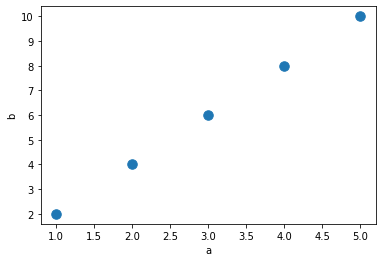

In [24]:
x=[1,2,3,4,5] 
y=[2,4,6,8,10]
plt.scatter(x,y,s=90)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [25]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[1],
        [2],
        [3],
        [4],
        [5]]), array([ 2,  4,  6,  8, 10]))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/8, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [-8.7485]	 Bias: [0.3155]	 Cost: 654.1752653125
Iteration: 1	 Weight: [-8.5031775]	 Bias: [0.37936]	 Cost: 622.4397419355109
Iteration: 2	 Weight: [-8.26388058]	 Bias: [0.44162035]	 Cost: 592.2459547473311
Iteration: 3	 Weight: [-8.03046105]	 Bias: [0.50232039]	 Cost: 563.5190032452606
Iteration: 4	 Weight: [-7.80277436]	 Bias: [0.56149851]	 Cost: 536.187625738198
Iteration: 5	 Weight: [-7.58067955]	 Bias: [0.61919216]	 Cost: 510.1840225661166
Iteration: 6	 Weight: [-7.36403907]	 Bias: [0.67543786]	 Cost: 485.4436879078848
Iteration: 7	 Weight: [-7.1527188]	 Bias: [0.73027121]	 Cost: 461.9052497601864
Iteration: 8	 Weight: [-6.94658789]	 Bias: [0.78372698]	 Cost: 439.51031769057704
Iteration: 9	 Weight: [-6.74551873]	 Bias: [0.83583906]	 Cost: 418.20333798698994
Iteration: 10	 Weight: [-6.54938684]	 Bias: [0.88664049]	 Cost: 397.93145584436166
Iteration: 11	 Weight: [-6.35807078]	 Bias: [0.93616353]	 Cost: 378.6443842464977
Iteration: 12	 Weight: [-6.17145213]	 Bi

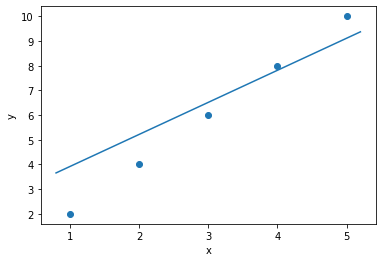

In [27]:
w = regressor.weight
b = regressor.bias
x=[1,2,3,4,5] 
y=[2,4,6,8,10]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()